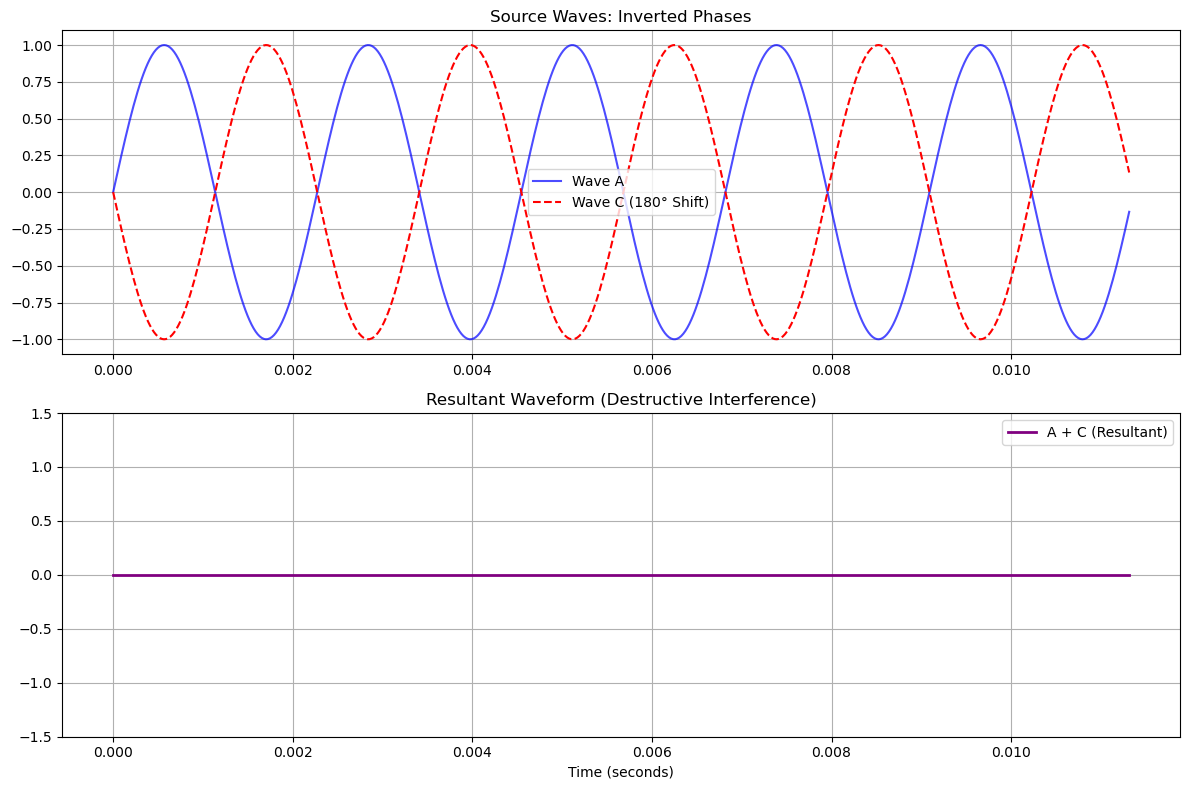

Files created: 'phase_test_constructive.wav' and 'phase_test_destructive.wav'
Playing constructive (loud)...
Playing destructive/cancellation (silence)...


0

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import struct
import os

def save_wav(file_name, data, fs=44100):
    """Saves a numpy array as a 16-bit WAV file."""
    n_samples = len(data)
    # Ensure data is in 16-bit range
    if np.max(np.abs(data)) > 0:
        data = (data / np.max(np.abs(data)) * 32767)
    
    with wave.open(file_name, 'w') as f:
        f.setnchannels(1)  # Mono
        f.setsampwidth(2)  # 2 bytes per sample
        f.setframerate(fs)
        for sample in data:
            f.writeframes(struct.pack('h', int(sample)))

# 1. Setup Parameters
fs = 44100
duration = 2.0
t = np.linspace(0, duration, int(fs * duration), False)
freq = 440.0  # A4 Note

# 2. Create the Waves
wave_a = np.sin(2 * np.pi * freq * t)
wave_b_in_phase = np.sin(2 * np.pi * freq * t)            # 0 degree shift
wave_c_out_phase = np.sin(2 * np.pi * freq * t + np.pi)   # 180 degree shift

# 3. Interferometry
# Constructive: 1 + 1 = 2 (Loud)
constructive = wave_a + wave_b_in_phase

# Destructive: 1 + (-1) = 0 (Silence)
destructive = wave_a + wave_c_out_phase

# 4. Plotting
# We only want to plot a tiny slice (e.g., first 500 samples) to see the waves
zoom = 500 

plt.figure(figsize=(12, 8))

# Subplot 1: The two source waves
plt.subplot(2, 1, 1)
plt.plot(t[:zoom], wave_a[:zoom], label="Wave A", color='blue', alpha=0.7)
plt.plot(t[:zoom], wave_c_out_phase[:zoom], label="Wave C (180° Shift)", color='red', linestyle='--')
plt.title("Source Waves: Inverted Phases")
plt.legend()
plt.grid(True)

# Subplot 2: The Result
plt.subplot(2, 1, 2)
plt.plot(t[:zoom], destructive[:zoom], label="A + C (Resultant)", color='purple', linewidth=2)
plt.ylim(-1.5, 1.5) # Keep scale consistent
plt.title("Resultant Waveform (Destructive Interference)")
plt.xlabel("Time (seconds)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 4. Save and Play
save_wav("phase_test_constructive.wav", constructive)
save_wav("phase_test_destructive.wav", destructive)

print("Files created: 'phase_test_constructive.wav' and 'phase_test_destructive.wav'")
print("Playing constructive (loud)...")
os.system("afplay phase_test_constructive.wav") # Native macOS audio player

print("Playing destructive/cancellation (silence)...")
os.system("afplay phase_test_destructive.wav")